In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('iris.csv')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
X = dataset.iloc[:, 1:5]
y = dataset['Species'].values

In [18]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
#### Splitting the dataset into the Training set and Test set ###
# # Once we have obtained our data set, we have to split the data into the training set and the test set.
# In this data set, there are 150 rows with 50 rows of each of the 3 classes. 
# As each class is given in a continuous order, we need to randomly split the dataset. 
# Here, we have the test_size=0.2, which means that 20% of the dataset will be used for testing purpose as the test set 
# and the remaining 80% will be used as the training set for training the Naive Bayes classification model.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [12]:
# Step 4: Feature Scaling
# The dataset is scaled down to a smaller range using the Feature Scaling option. 
# In this, both the X_train and X_test values are scaled down to smaller values to improve the speed of the program.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Training the Naive Bayes Classification model on the Training Set
# In this step, we introduce the class GaussianNB that is used from the sklearn.naive_bayes library. 
# Here, we assign the GaussianNB class to the variable classifier and fit the X_train and y_train values to it for training purpose.
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [14]:
#  Predicting the Test set results
# Once the model is trained, we use the the classifier.predict() to predict the values for the Test set and the values predicted are stored to the variable y_pred.
y_pred = classifier.predict(X_test) 
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa'], dtype='<U15')

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.9333333333333333


array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  7]])

In [16]:
#Diagonal elements show true positives ( number of samples that are correctly classified as belonging to that class.)
#12+9+7=28

30

In [17]:
#Comparing the Real Values with Predicted Values
# In this step, a Pandas DataFrame is created to compare the classified values of both the original Test set (y_test) and the predicted results (y_pred).
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,Iris-setosa,Iris-setosa
1,Iris-versicolor,Iris-versicolor
2,Iris-virginica,Iris-versicolor
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor


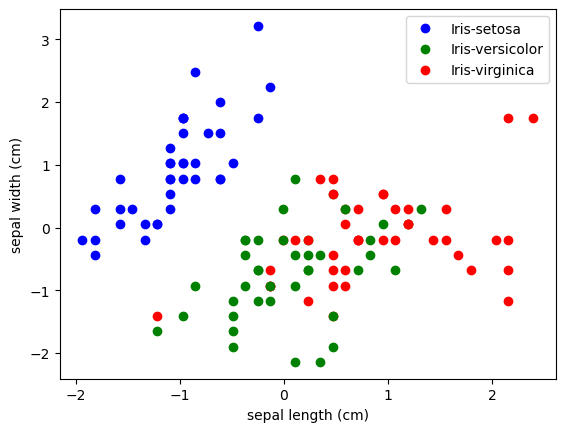

In [27]:
# Create a dictionary to map class names to colors
class_colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'green', 'Iris-virginica': 'red'}

# Create a scatter plot
fig, ax = plt.subplots()
for i in range(len(X_train)):
    ax.scatter(X_train[i,0], X_train[i,1], color=class_colors[y_train[i]])
    
# Set the x and y axis labels
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

# Create a legend
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in class_colors.values()]
ax.legend(markers, class_colors.keys(), numpoints=1)

# Show the plot
plt.show()

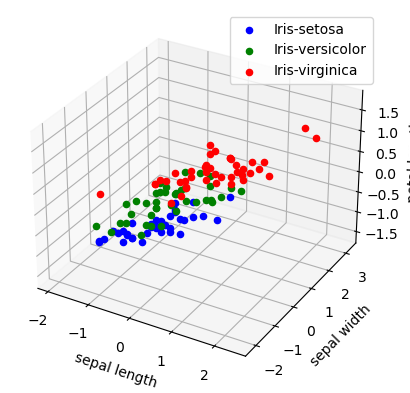

In [26]:
# create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(len(X_train)):
    ax.scatter(X_train[i][0], X_train[i][1], X_train[i][2], c=class_colors[y_train[i]], marker='o')
    
# set the labels for each axis
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')

# add a legend for the different classes
for label in class_colors:
    ax.scatter([], [], [], c=class_colors[label], label=label)
ax.legend()

# show the plot
plt.show()